<a href="https://colab.research.google.com/github/SamGrobelny/ASTRON1221/blob/main/rotational_curve_for_milky_way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np # inport for numpy math
import astropy.constants as ac # import for astronomical constants
import astropy.units as u # import for astronomical units
import matplotlib.pyplot as plt # import for plotting the calculated data

In [58]:
def orbital_velocity(M, R):
    """
    This is the function that calculates the orbital velocity.

    Args:
      M: the mass of the central object
      R: the orbital radius

    Returns:
      the orbital velocity of the object
    """
    G = ac.G # define G as the gravitational constant
    V = np.sqrt(G*M/R) # define V as the final orbital velocity of the object
    return V

In [59]:
# define imput M and R
M = 1 * u.earthMass
R = 1 * u.earthRad

# calculate orbital velocity of an earth satellite
V_earth_satellite = orbital_velocity(M, R)

In [60]:
# orbital radius of the eight solar system planets from inside out
# in astronomical units
distances = np.array([0.4, 0.7, 1.0, 1.5, 5.2, 9.6, 19.2, 30.1]) * u.au

# define mass of the sun
M_sun = 1 * u.solMass

# calculate velocity for all planets
result = orbital_velocity(M_sun, distances).to(u.km/u.s)

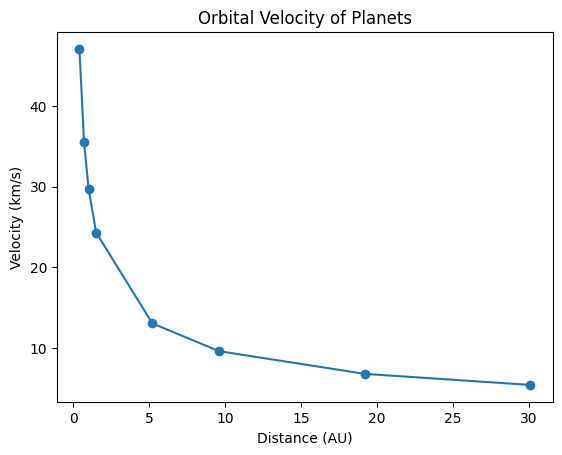

In [61]:
# generate plot for orbital velocity of the planets
plt.plot(distances.value, result.value, 'o-') # plotting velocity vs orbital radius
plt.xlabel('Distance (AU)') # add x axis label
plt.ylabel('Velocity (km/s)') # add y axis label
plt.title('Orbital Velocity of Planets') # add title
plt.show() # show plot

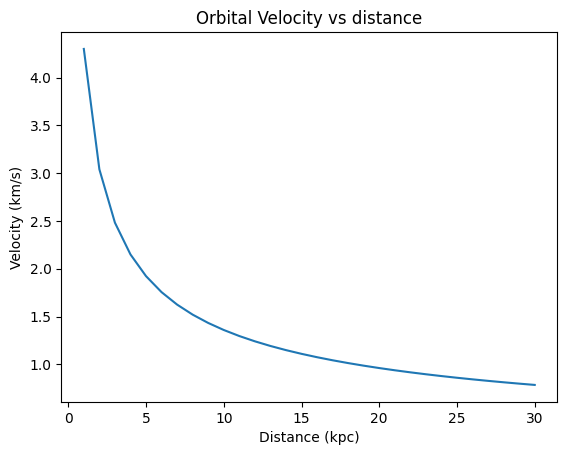

In [62]:
M_black_hole = 4297000 * u.solMass # mass of the black hole
arr = np.arange(1, 31) * u.kpc # define array of radii from 1 to 30 kiloparsec

# create array result that is the orbital velocities of objects at distances
# ranging from 1 to 30 kiloparsec from a central black hole
result = orbital_velocity(M_black_hole, arr).to(u.km/u.s)

# plot the black holw
plt.plot(arr.value, result.value, '-')
plt.xlabel('Distance (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Orbital Velocity vs distance')
plt.show()

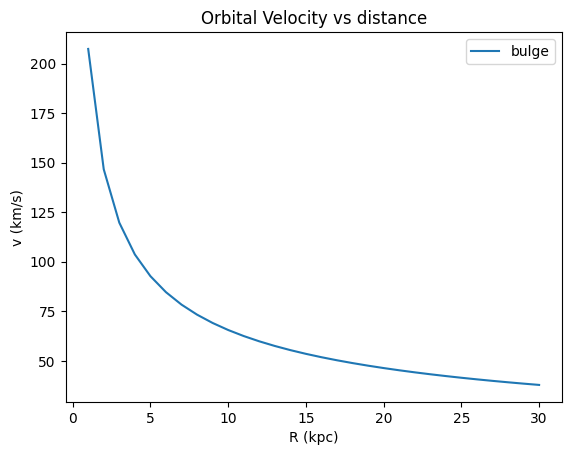

In [63]:
M_galactic_bulge = (1e10) * u.solMass # define as mass of galactic bulge

# calculate the orbiatal velocity for the bulge at increasing radii
v_arr = orbital_velocity(M_galactic_bulge, arr).to(u.km/u.s)

# plot the graph for the bulge
plt.plot(arr.value, v_arr.value, '-', label="bulge")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.title('Orbital Velocity vs distance')
plt.legend()
plt.show()

In [64]:
M_disk = 5.2e10 * u.solMass # mass of the disk
R_disk = 10 * u.kpc # radius of the disk
density_disk = M_disk/(np.pi*R_disk**2) # density of the disk

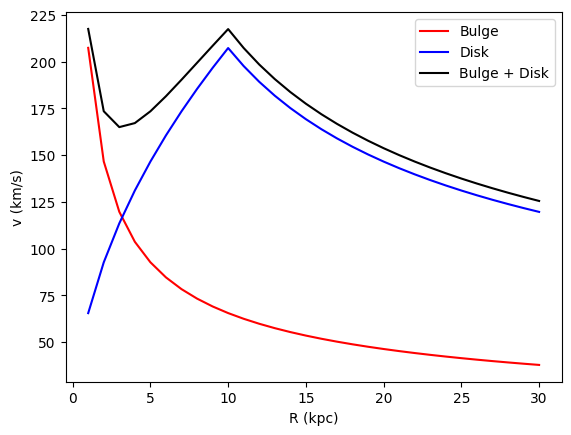

In [65]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
    """
    calculate enclosed mass of milky way by adding up the mass of the disk and
    the bulge
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_total = M_disk + M_galactic_bulge
    return(M_total)

# calculate array for orbital velocity of the bulge
v_bulge_arr = orbital_velocity(M_galactic_bulge, arr).to(u.km/u.s)

M_disk = np.zeros(len(arr)) * u.solMass # array for mass of disk
M_total = np.zeros(len(arr)) * u.solMass # array for mass of disk + bulge

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(arr[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(arr[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = orbital_velocity(M_disk, arr)
v_bulge_disk_arr = orbital_velocity(M_total, arr)

# Plot them all
plt.plot(arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [66]:
# import packages to upload file and add data to graph
from google.colab import files
uploaded = files.upload()
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")

Saving galaxy_rotation_2006.txt to galaxy_rotation_2006 (1).txt


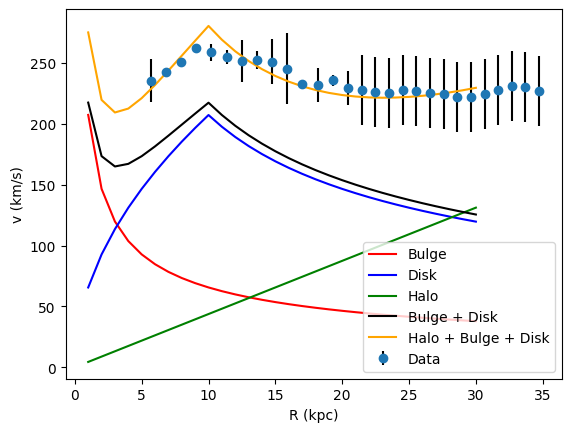

In [67]:
M_halo =  12e10 * u.solMass # mass of the halo
R_halo = 30 * u.kpc # radius of the halo
Volume_halo = 4/3 * np.pi * (R_halo**3) # volume of halo
density_halo = M_halo / Volume_halo # density of halo

def calculatingEnclosedMassForHalo(R, density):
    """
    Calculate enclosed mass for the sphere component
    Input: R - orbital radius, density - density of the halo as calculated above
    Output: M - enclosed mass
    """
    M = ((4/3) * np.pi * (R**3)) * density
    # print(M)
    return(M)

# create zeros array for the halo's mass
M_halo_arr = np.zeros(len(arr)) * u.solMass # Don't forget unit here

# create zerod array to put the combined masses of the disk, halo, and bulge in
M_new_total = np.zeros(len(arr)) * u.solMass

# loop through each element of array and calculate mass for the disk, bulge, and
# halo individually and then add up to get the total mass of the system at each radius
for i in np.arange(len(arr)):
    M_disk[i] = calculatingEnclosedMassForDisk(arr[i])
    M_halo_arr[i] = calculatingEnclosedMassForHalo(arr[i], density_halo)
    M_total[i] = calculatingEnclosedMassForMilkyWay(arr[i])
    M_new_total[i] = M_total[i] + M_halo_arr[i]

# increase total mass by certain factor to move closer to overserved data
M_new_total = M_new_total * 1.6

# create orbital velocity array for halo itself
v_halo_arr = orbital_velocity(M_halo_arr, arr)

#create orbital velocity array for disk + bulge + halo
v_new_total_arr = orbital_velocity(M_new_total, arr)

# plot observed orbital velocity data
plt.errorbar(tab['col2'], tab['col3'], yerr=tab['col4'], ecolor='black', fmt='o', label='Data')

# Plot them all
plt.plot(arr.to(u.kpc), v_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(arr.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(arr.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo") # plotting halo
plt.plot(arr.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.plot(arr.to(u.kpc), v_new_total_arr.to(u.km/u.s), color="orange", label="Halo + Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

The calculated data was a little bit lower than the observed data but, after increasing total mass by around 50%, it seemed to fill well with the observed.